## Doing the CNN based aproach!

In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot  as plt



In [3]:
#opening the training file:
filename = "train/phase_4_TRAIN_22d5ff80542b443e_e2a955e_MLPC2021_melspect.h5"

h5_train = h5py.File(filename,'r')

In [4]:
#list(h5_train.keys())

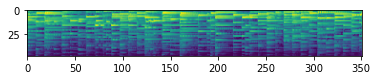

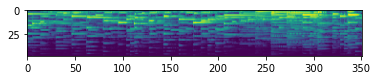

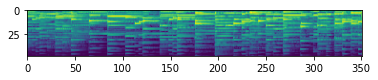

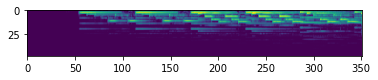

In [5]:
#looking at a few examples to get a feeling for it:
snippets=['GG-02-007','AH-02-003','AS-02-006','AH-01-000']
for snip in snippets:
    plt.imshow(h5_train[snip])
    plt.show()

In [6]:
#checking if Keras can use my GPU:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4309278845666355192
]


In [7]:
X_train=[h5_train[index] for index in list(h5_train)]
X_train=np.array(X_train)

In [8]:
#just for testing I created this fake y_train:
y_train=np.random.randint(0,2,len(X_train))
y_train=np.float32(y_train)

(48, 351)

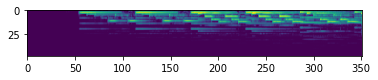

In [9]:
plt.imshow(X_train[0])
X_train[0].shape

In [10]:
#check if they are all of the same shape:
shapes =set()
for spectrogram in X_train:
    shapes.add(spectrogram.shape)
    

In [11]:
shapes

{(48, 351)}

In [12]:
# ==> yes they are all same shape
print(len(X_train))
print(len(y_train.shape))
y_train
X_train.shape

2607
1


(2607, 48, 351)

In [13]:
#trying torch instead because my tensorflow is to stupid to see GPU
import torch
import torchvision
import torchvision.transforms as transforms

In [24]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

myTrainset = []
for i in range(len(X_train)):
    myTrainset.append((X_train[i],y_train[i]))

trainset = myTrainset
print("hnjdsfnjkdsnf")
print(trainset)
print(trainset.shape)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('no', 'yes')

hnjdsfnjkdsnf
[(array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.4123831e+00,
        1.5408299e+00, 4.5624275e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.7476568e+00,
        5.5990372e+00, 5.1701965e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 6.2434483e+00,
        6.1343479e+00, 6.7542448e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.0641785e-04,
        2.1535794e-04, 2.6379155e-03],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.6359014e-04,
        7.0858739e-05, 2.2607790e-03],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.1367853e-04,
        7.2002906e-05, 2.5519608e-03]], dtype=float32), 0.0), (array([[4.5482640e+00, 1.7963378e+00, 1.8588531e+00, ..., 5.6458801e-01,
        1.1700457e+00, 1.0232403e+00],
       [6.3306170e+00, 6.0417066e+00, 5.6598372e+00, ..., 6.6158228e+00,
        6.5274415e+00, 6.0974073e+00],
       [7.9549847e+00, 8.3626661e+00, 7.6565247e+00,

AttributeError: 'list' object has no attribute 'shape'

In [28]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [29]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 10 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.001
[1,    11] loss: 0.011
[1,    21] loss: 0.012
[1,    31] loss: 0.011
[1,    41] loss: 0.011
[1,    51] loss: 0.011
[1,    61] loss: 0.011
[1,    71] loss: 0.012
[1,    81] loss: 0.012
[1,    91] loss: 0.012
[1,   101] loss: 0.012
[1,   111] loss: 0.012
[1,   121] loss: 0.012
[1,   131] loss: 0.012
[1,   141] loss: 0.011
[1,   151] loss: 0.011
[1,   161] loss: 0.011
[1,   171] loss: 0.012
[1,   181] loss: 0.012
[1,   191] loss: 0.012
[1,   201] loss: 0.012
[1,   211] loss: 0.012
[1,   221] loss: 0.011
[1,   231] loss: 0.011
[1,   241] loss: 0.011
[1,   251] loss: 0.011
[1,   261] loss: 0.012
[1,   271] loss: 0.011
[1,   281] loss: 0.012
[1,   291] loss: 0.011
[1,   301] loss: 0.012
[1,   311] loss: 0.011
[1,   321] loss: 0.012
[1,   331] loss: 0.012
[1,   341] loss: 0.012
[1,   351] loss: 0.012
[1,   361] loss: 0.012
[1,   371] loss: 0.012
[1,   381] loss: 0.012
[1,   391] loss: 0.011
[1,   401] loss: 0.012
[1,   411] loss: 0.012
[1,   421] loss: 0.012
[1,   431] 

[1,  3581] loss: 0.009
[1,  3591] loss: 0.010
[1,  3601] loss: 0.008
[1,  3611] loss: 0.009
[1,  3621] loss: 0.008
[1,  3631] loss: 0.009
[1,  3641] loss: 0.009
[1,  3651] loss: 0.009
[1,  3661] loss: 0.009
[1,  3671] loss: 0.010
[1,  3681] loss: 0.009
[1,  3691] loss: 0.010
[1,  3701] loss: 0.010
[1,  3711] loss: 0.009
[1,  3721] loss: 0.010
[1,  3731] loss: 0.009
[1,  3741] loss: 0.008
[1,  3751] loss: 0.008
[1,  3761] loss: 0.009
[1,  3771] loss: 0.009
[1,  3781] loss: 0.009
[1,  3791] loss: 0.010
[1,  3801] loss: 0.009
[1,  3811] loss: 0.010
[1,  3821] loss: 0.009
[1,  3831] loss: 0.008
[1,  3841] loss: 0.009
[1,  3851] loss: 0.008
[1,  3861] loss: 0.009
[1,  3871] loss: 0.008
[1,  3881] loss: 0.009
[1,  3891] loss: 0.008
[1,  3901] loss: 0.007
[1,  3911] loss: 0.009
[1,  3921] loss: 0.008
[1,  3931] loss: 0.009
[1,  3941] loss: 0.008
[1,  3951] loss: 0.009
[1,  3961] loss: 0.008
[1,  3971] loss: 0.008
[1,  3981] loss: 0.009
[1,  3991] loss: 0.008
[1,  4001] loss: 0.010
[1,  4011] 

[1,  7181] loss: 0.007
[1,  7191] loss: 0.007
[1,  7201] loss: 0.008
[1,  7211] loss: 0.008
[1,  7221] loss: 0.008
[1,  7231] loss: 0.009
[1,  7241] loss: 0.008
[1,  7251] loss: 0.007
[1,  7261] loss: 0.007
[1,  7271] loss: 0.007
[1,  7281] loss: 0.008
[1,  7291] loss: 0.008
[1,  7301] loss: 0.008
[1,  7311] loss: 0.008
[1,  7321] loss: 0.008
[1,  7331] loss: 0.008
[1,  7341] loss: 0.008
[1,  7351] loss: 0.007
[1,  7361] loss: 0.007
[1,  7371] loss: 0.008
[1,  7381] loss: 0.008
[1,  7391] loss: 0.008
[1,  7401] loss: 0.008
[1,  7411] loss: 0.009
[1,  7421] loss: 0.008
[1,  7431] loss: 0.008
[1,  7441] loss: 0.007
[1,  7451] loss: 0.008
[1,  7461] loss: 0.008
[1,  7471] loss: 0.007
[1,  7481] loss: 0.007
[1,  7491] loss: 0.009
[1,  7501] loss: 0.008
[1,  7511] loss: 0.007
[1,  7521] loss: 0.009
[1,  7531] loss: 0.010
[1,  7541] loss: 0.007
[1,  7551] loss: 0.008
[1,  7561] loss: 0.008
[1,  7571] loss: 0.009
[1,  7581] loss: 0.007
[1,  7591] loss: 0.008
[1,  7601] loss: 0.009
[1,  7611] 

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()


# print images
plt.imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))